In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

In [18]:
df=pd.read_csv('After_EDA.csv')

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'BalanceSalaryRatio',
       'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [8]:
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,14.829268
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,11.952381
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,17.923077
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0,0.000000,0.128205,19.769231
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0,0.564108,0.285714,14.742857
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1,0.000000,0.194444,19.694444
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1,0.808230,0.071429,18.380952


<h4>Let's Remove column RowNumber,CustomerId as they are unique to all the customers and dont have any variance to a proportion of the dataset</h4> 

In [11]:
df2=df.iloc[:,3:]

In [12]:
df2.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited', 'BalanceSalaryRatio', 'TenureByAge', 'CreditScoreGivenAge'],
      dtype='object')

In [13]:
# Arranging columns by data type for easier manipulation

continuous_vars = ['CreditScore',  'Age', 'Tenure', 'Balance','NumOfProducts', 'EstimatedSalary', 'BalanceSalaryRatio',
                   'TenureByAge','CreditScoreGivenAge']

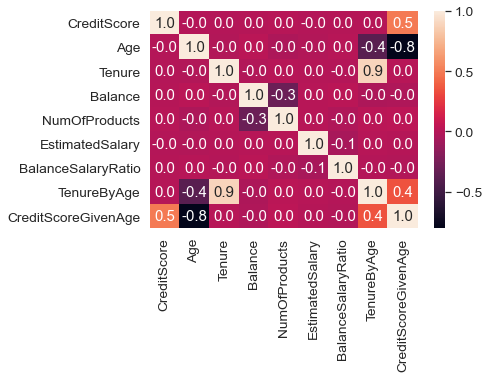

In [15]:
sns.set()
sns.set(font_scale = 1.25)
sns.heatmap(df2[continuous_vars].corr(), annot = True,fmt = ".1f")
plt.show()

<h4>We can see from the correlation matrix that only the columns which we have created have some significant correlation with columns they are made from.</h4>

In [16]:
# Changing values of column HasCrCard and IsActiveMember from 0 to -1 so that they will influence negatively to the model instead of no effect.
df2.loc[df2.HasCrCard == 0, 'HasCrCard'] = -1
df2.loc[df2.IsActiveMember == 0, 'IsActiveMember'] = -1
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,Spain,Female,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268
2,502,France,Female,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381
3,699,France,Female,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442


In [19]:
from sklearn.preprocessing import LabelEncoder 
  
le = LabelEncoder() 
  
df2['Gender']= le.fit_transform(df2['Gender']) 
df2['Geography']= le.fit_transform(df2['Geography']) 

# Gender 0-Female,1-Male
# Geography 0-France,1-Germany,2-Spain

In [20]:
df2

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,619,0,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,14.738095
1,608,2,0,41,1,83807.86,1,-1,1,112542.58,0,0.744677,0.024390,14.829268
2,502,0,0,42,8,159660.80,3,1,-1,113931.57,1,1.401375,0.190476,11.952381
3,699,0,0,39,1,0.00,2,-1,-1,93826.63,0,0.000000,0.025641,17.923077
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,19.767442
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,-1,96270.64,0,0.000000,0.128205,19.769231
9996,516,0,1,35,10,57369.61,1,1,1,101699.77,0,0.564108,0.285714,14.742857
9997,709,0,0,36,7,0.00,1,-1,1,42085.58,1,0.000000,0.194444,19.694444
9998,772,1,1,42,3,75075.31,2,1,-1,92888.52,1,0.808230,0.071429,18.380952


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[continuous_vars] = scaler.fit_transform(df2[continuous_vars])

In [23]:
df2.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,CreditScoreGivenAge
0,0.538,0,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.085714,0.235083
1,0.516,2,0,0.310811,0.1,0.334031,0.000000,-1,1,0.562709,0,0.000070,0.043902,0.237252
2,0.304,0,0,0.324324,0.8,0.636357,0.666667,1,-1,0.569654,1,0.000132,0.342857,0.168807
3,0.698,0,0,0.283784,0.1,0.000000,0.333333,-1,-1,0.469120,0,0.000000,0.046154,0.310859
4,1.000,2,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,0.000150,0.083721,0.354739


In [25]:
df2.to_csv("After_feature_engineering_selection.csv",index=False)